This notebook is inspired from [this](https://github.com/kapadias/mediumposts/blob/master/nlp/published_notebooks/Introduction%20to%20Topic%20Modeling.ipynb) post

We will apply the LDA implementation of [sklearn](https://scikit-learn.org/stable/) to the collection of arxiv abstracts. 

If it takes too long, try taking a subset of the data

In [2]:
# Load the data
import pandas as pd
data = pd.read_csv("./arxiv_articles.csv", sep="|")
data.loc[0:5, :]

,id,title,authors,arxiv_primary_category,summary,published,updated
0,http://arxiv.org/abs/2001.05867v1,$σ$-Lacunary actions of Polish groups,Jan Grebik,math.LO,We show that every essentially countable orbit...,2020-01-16T15:09:02Z,2020-01-16T15:09:02Z
1,http://arxiv.org/abs/1303.6933v1,Hans Grauert (1930-2011),Alan Huckleberry,math.HO,Hans Grauert died in September of 2011. This a...,2013-03-27T19:23:57Z,2013-03-27T19:23:57Z
2,http://arxiv.org/abs/1407.3775v1,A New Proof of Stirling's Formula,Thorsten Neuschel,math.HO,A new simple proof of Stirling's formula via t...,2014-07-10T11:26:39Z,2014-07-10T11:26:39Z
3,http://arxiv.org/abs/math/0307381v3,On Dequantization of Fedosov's Deformation Qua...,Alexander V. Karabegov,math.QA,To each natural deformation quantization on a ...,2003-07-30T06:20:33Z,2003-09-20T01:29:18Z
4,http://arxiv.org/abs/1604.06794v1,Cyclic extensions are radical,Mariano Suárez-Álvarez,math.HO,We show that finite Galois extensions with cyc...,2016-04-21T22:24:54Z,2016-04-21T22:24:54Z
5,http://arxiv.org/abs/1712.09576v2,The Second Main Theorem in the hyperbolic case,Min Ru;Nessim Sibony,math.CV,We develop Nevanlinna's theory for a class of ...,2017-12-27T13:17:08Z,2019-01-03T07:51:11Z


In [3]:
# Remove punctuation
import re
data['summary_text_processed'] = data['summary'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the summaries to lowercase
data['summary_text_processed'] = data['summary_text_processed'].map(lambda x: x.lower())

# Print out the first rows of summaries
data['summary_text_processed'].head()

0    we show that every essentially countable orbit...
1    hans grauert died in september of 2011 this ar...
2    a new simple proof of stirling's formula via t...
3    to each natural deformation quantization on a ...
4    we show that finite galois extensions with cyc...
Name: summary_text_processed, dtype: object

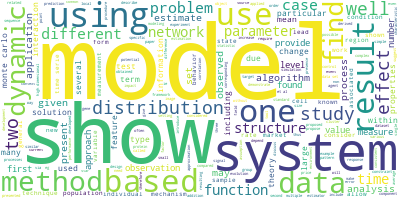

In [4]:
# Do some exploratory analysis

# Import the wordcloud library
from wordcloud import WordCloud

# Joint all the summaries together
long_string = ','.join(data['summary_text_processed'])

# Create a WordCloud object
wc = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color="steel blue")

# Generate a word cloud
wc.generate(long_string)

# Visualize the word cloud
wc.to_image()

### Preparing the text for LDA

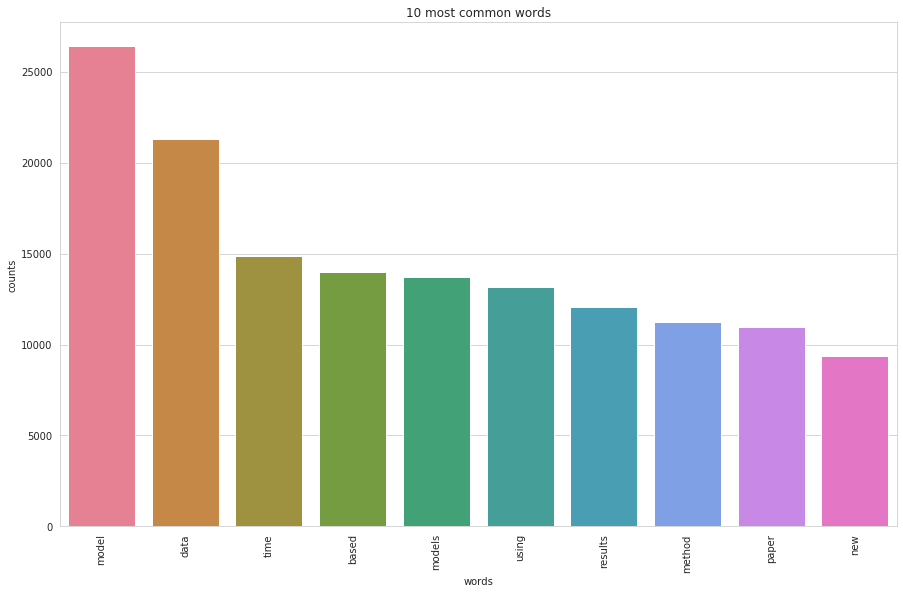

In [5]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
#count_vectorizer est une fct qui garde des mots valables
#words est une liste de tous les mots utiles du corpus par ordre alphabetiques FAUX
#ca contient un dictionnaire de "tous" mots anglais
    words = count_vectorizer.get_feature_names()
#crée un vecteur de la taille du nombre total de mots
    total_counts = np.zeros(len(words))

    for t in count_data:
        total_counts+=t.toarray()[0]
        
   #associe chaque mot à son nombre d'apparition sur tous les documents dans un dictionnaire, le trie
# et garde les 10 premiers
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
#prend les mots du docs, lui associe son ordre d'apparition et son nbr d'apparition.
count_data = count_vectorizer.fit_transform(data['summary_text_processed'])
print

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [7]:
print(count_vectorizer.get_feature_names())

['00', '000', '000000015', '00000008', '00000043', '000001', '0000025', '000004', '0000072', '00001', '0000183', '00002', '00003', '000032', '000034', '000036', '000039', '00004', '000046', '00005', '00006', '000060', '000071', '000077', '000079', '000099', '0001', '0001039', '000114', '000137', '0001432', '0001611', '00018', '0002', '00021', '000248', '00025', '00026', '00027', '00028', '0003', '00036', '0003dex', '0004', '00040', '0004_', '0005', '00050', '00052', '000522', '00053', '00055', '0006', '00060', '00064', '00069', '0006_', '0007', '00070', '00071', '00075', '00079', '0008', '00080', '0008305', '0008_', '0009', '0009783', '000980', '000k', '001', '0010', '0010_', '0011', '00115', '0011_', '0012', '0012037', '0012s', '0013', '00130', '001304', '001356', '0014', '00145', '0015', '00156', '0016', '00165', '0017', '0017mm', '0018', '0019', '00191', '001au', '001m_', '002', '0020', '0021', '00217562', '0022', '00227', '00228_', '0023', '00234', '0024', '0025', '0026', '00263', 

### LDA model training

In [5]:
%%time

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

import pickle
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 15
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

# Save the fitted lda model (the trained model) with 10 topics
with open("./arxiv_LDA_10topics_trained", "wb") as f:
    pickle.dump(lda, f)


Topics found via LDA:

Topic #0:
data algorithm noise method based model information models spatial using

Topic #1:
mass stars ray high star observations 10 energy stellar emission

Topic #2:
problem time optimal function stochastic process paper solution equation case

Topic #3:
cancer protein model population proteins data based models patients drug

Topic #4:
model models algorithm distribution data carlo monte markov distributions bayesian

Topic #5:
network time model networks series order graph power price data

Topic #6:
economic growth agents countries social game study policy paper economy

Topic #7:
data learning based paper using performance used new use methods

Topic #8:
data analysis method using clusters sequence used cluster sequences sequencing

Topic #9:
risk market model financial price volatility portfolio time stock prices

Topic #10:
gene genes expression network networks dna regulatory genome protein genetic

Topic #11:
systems theory models physics statistical 

### Analyzing the fitted LDA model

We will use a python visualisation package called pyLDAvis

In [6]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import os
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        


/home/willy/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


CPU times: user 49 s, sys: 1.15 s, total: 50.1 s
Wall time: 13min 10s


In [31]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

pyLDAvis.display(LDAvis_prepared)

NameError: name 'LDAvis_data_filepath' is not defined

## Maintenant c'est à vous

1. Lire la documentation du ldavis [ici](https://github.com/bmabey/pyLDAvis) et [ici](https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)

2. Implémenter le processus de génération d'un corpus décrit dans le modèle du LDA. Le processus est décrit [ici](https://web.archive.org/web/20120207011313/http://jmlr.csail.mit.edu/papers/volume3/blei03a/blei03a.pdf), [ici](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf) ou bien sur [Wikipédia](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)